In [16]:
import numpy as np
from matplotlib import pyplot as plt

N = 10000
window = 100

In [19]:
uni_set = np.random.uniform(-1, 1, N)
norm_set = np.random.randn(N)

print(f'Uniform set: {uni_set.std()}')
print(f'Normal set: {norm_set.std()}')

Uniform set: 0.5732749634664404
Normal set: 0.9948558941742849
100.0


In [31]:
rev_size = int(N/window)

uni_chunk = np.empty(rev_size)
uni_prog = np.empty(rev_size)
norm_chunk = np.empty(rev_size)
norm_prog = np.empty(rev_size)
prev = 0
wins = list(range(0, N, window))

for n, value in enumerate(wins):
    
    uni_chunk[n] = uni_set[value:(value+window)].std()
    uni_prog[n] = uni_set[:(value+window)].std()
    norm_chunk[n] = norm_set[value:(value+window)].std()
    uni_prog[n] = norm_set[:(value+window)].std()

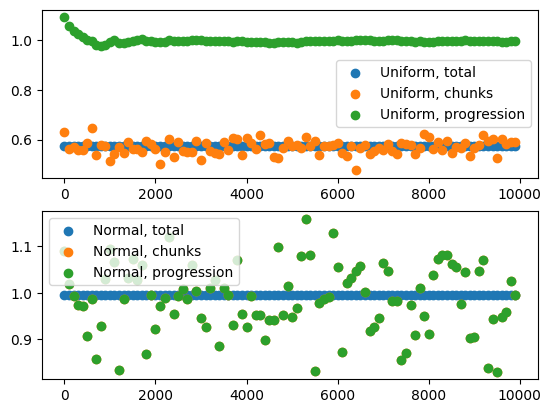

In [36]:
fig, ax = plt.subplots(2, 1)
ax[0].scatter(wins, [uni_set.std()]*len(wins), label='Uniform, total')
ax[0].scatter(wins, uni_chunk, label='Uniform, chunks')
ax[0].scatter(wins, uni_prog, label='Uniform, progression')
ax[0].legend()
ax[1].scatter(wins, [norm_set.std()]*len(wins), label='Normal, total')
ax[1].scatter(wins, norm_chunk, label='Normal, chunks')
ax[1].scatter(wins, norm_prog, label='Normal, progression')
ax[1].legend()
#ax[1, 0].plot(uni_set)
#ax[1, 1].plot(norm_set)